### Importing Neccessary Libraries

In [40]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data Sets

In [41]:
comments  = pd.read_csv('data/UScomments.csv', error_bad_lines =False)


b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
D:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Descriptive Analysis of the DataSet

In [42]:
def aboutTheData():
    print("Here is the information about the data used")
    print('Number of Instances', comments.shape[0])
    print('Number of Features', comments.shape[1])
    print("-------------------------------------------")
    print('Summary Statistics')
    print(comments.describe())
    print("-------------------------------------------")
    print('Missing Values ?')
    print(comments.isna().sum())
aboutTheData()

Here is the information about the data used
Number of Instances 691400
Number of Features 4
-------------------------------------------
Summary Statistics
           video_id comment_text   likes  replies
count        691400       691375  691400   691400
unique         2266       434076    1284      479
top     LunHybOKIjU          Lol       0        0
freq            800          310  456894   525730
-------------------------------------------
Missing Values ?
video_id         0
comment_text    25
likes            0
replies          0
dtype: int64


### Cleaning the data

In [43]:
comments.dropna(inplace = True)
print('Data Frame after cleaning Data')

print(comments.isna().sum())

Data Frame after cleaning Data
video_id        0
comment_text    0
likes           0
replies         0
dtype: int64


### TextBlob
TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [44]:
!pip install textblob

In [45]:
from textblob import TextBlob

### Checking Polarity
Polarity checks if the data is positive sentiment or negative sentiment.


In [46]:
polarityDetails = []

for i in comments['comment_text']:
    polarityDetails.append(TextBlob(i).sentiment.polarity)


### Adding Polarity Values to the DataFrame as  a column

In [47]:
comments['Polarity'] = polarityDetails
print(comments.head(30))

       video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1G

### Positive Sentiments

In [49]:
positive_sentiment = comments[comments['Polarity'] ==  1]
print(positive_sentiment)

           video_id                                       comment_text likes  \
64      XpVt6Z1Gjjo                                    yu are the best     1   
156     cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227     WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307     sjlHnJvXdQs                                  This is priceless     0   
319     sjlHnJvXdQs                                Summed up perfectly     0   
...             ...                                                ...   ...   
691373  EoejGgUNmVU                             Perfect. Every version     0   
691383  EoejGgUNmVU                                  Me encantaaaaa <3     0   
691388  EoejGgUNmVU                                   Best song ever 🤘     0   
691389  EoejGgUNmVU                              excellent performance     0   
691393  EoejGgUNmVU                                                 <3     0   

       replies  Polarity  
64          

### Number of Positive Sentiments

In [50]:

no_of_positve_sentiment = positive_sentiment.shape[0]
print(no_of_positve_sentiment)

19390


### Negative Sentiments

In [51]:
negative_sentiment = comments[comments['Polarity'] ==  -1]
print(negative_sentiment)

           video_id                                       comment_text likes  \
512     8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562     8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952     Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371    vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391    vu_9muoxT50                    cheeseus christ thats insane!!!     0   
...             ...                                                ...   ...   
690788  Hlt3rA-oDao                                Like Kelly she evil     0   
690865  Ni5Uc-DdMqk                     R U FUCKING KIDDING ME?!?!?!?!    11   
691073  4kmSATD25iY           This is horribly offensive please report     0   
691180  xlu6i6lT_vk  Sink holes looks terrifying sinkholes sink you...     0   
691224  qRoVlH1OcI4  Trump talked to the president of US Virgin Isl...     0   

       replies  Polarity  
512         

### Number of Negavtive  Sentiments

In [52]:
no_of_negative_sentiment = negative_sentiment.shape[0]
print(no_of_negative_sentiment)


3508


### A Pie Chart Showing the % of Positive and Negative Sentiment Polarity

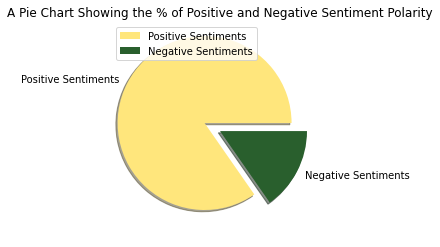

In [65]:
total_count =[]

total_count.append(no_of_positve_sentiment)

total_count.append(no_of_negative_sentiment)

label =['Positive Sentiments', 'Negative Sentiments']

myexplode = [0.2, 0.0]

color = ['#FFE67C', '#295F2D']

plt.pie(total_count, labels= label, explode = myexplode, shadow = True, colors=color, radius =1)

plt.title('A Pie Chart Showing the % of Positive and Negative Sentiment Polarity')

plt.legend(loc=2)

plt.show()

### Installing WorldCloud
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In [66]:
!pip install wordcloud

In [67]:
from wordcloud import STOPWORDS, WordCloud

In [68]:
stopwords = set(STOPWORDS)

In [69]:
positve_comments =  ''.join(positive_sentiment['comment_text'])
print(positve_comments)

yu are the bestPower is the disease.  Care is the cure.  Keep caring for yourself and others as best as you can.  This is life.YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :DThis is pricelessSummed up perfectlyThis is awesome. 1:20 XDDDDDDDDDBEST MOVIE EVER!!!Power is the disease.  Care is the cure.  Keep caring for yourself and others as best as you can.  This is life.The greatest movie about the greatest movie.It's Harry guys he's Spiderman best friendBest remake ever!Great review!awesome vlogSubscribe to me if Roman Atwood is the best youtuberI was attacked by a police dog once, \n\n\n\n\n\nthat was the best use of peanut butter ever.The best part of the movie was the creditsDO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\nyou must see too guys! that was awesome.Please say uncle touchy. Prease honest trail

### Positive Comments Visualization

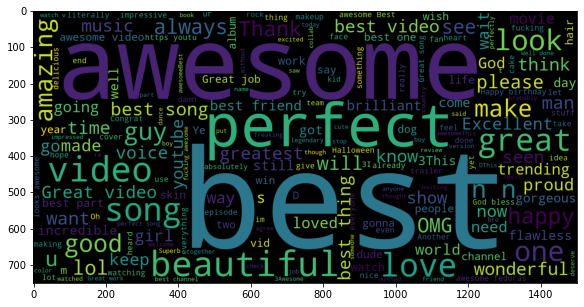

In [79]:
cloudPositive =WordCloud(width = 1500, height=750, stopwords =stopwords).generate(positve_comments)

#The figure() function in pyplot module of matplotlib library is used to create a new figure.
plt.figure(figsize=(15,5))

# imshow() pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.imshow(cloudPositive)

plt.show()

In [77]:
negative_comments = ''.join(negative_sentiment['comment_text'])
print(negative_comments)

BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!!Well… The brain surgeon Ben Carson just proved how truly insane he is…WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!WTF BRUH!!!!!!cheeseus christ thats insane!!!this is the worst thing i've heard. ever.Economy is horrible in Cuba. It's going to be years before they get out of this.Sub to me if this is terriblePATHETICI don't like this sportscaster  sounds very annoyingcommentators are awfulThis tv show became trump witch hunt tube... and frankly, boring.Arpaio should be arrested again for horribly butchering that song.This  show has become one-noted and pathetic.HARD CANDY!!!!!!!!!!!Tired of the philosophy add !!!!!!!boring0:22   **laughs at terrible pun**Why is media even covering this disgusting woman anymore?How is this trending ? Awfula horrible attempt to try and get us to freak outthis is one of the worst videos I've ever seenWhats with the horrible music? tfShe is the worst.Boringborin

### Negative Comments Visualization

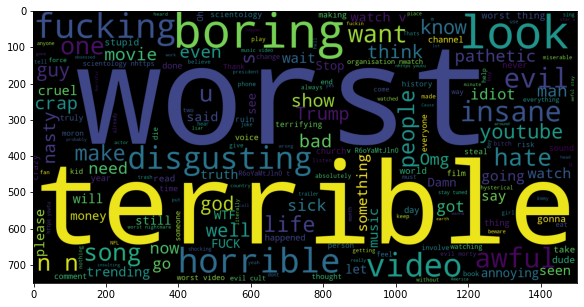

In [78]:
cloudNegative =WordCloud(width = 1500, height=750, stopwords =stopwords).generate(negative_comments)

#The figure() function in pyplot module of matplotlib library is used to create a new figure.
plt.figure(figsize=(15,5))

# imshow() pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.imshow(cloudNegative)

plt.show()